# Previsão de Custos Médicos com Regressão Linear

Este notebook tem como objetivo desenvolver um modelo de regressão capaz de prever o valor dos custos médicos individuais cobrados pelo seguro de saúde, com base em características como idade, gênero, IMC, número de filhos, hábito de fumar e região.

As etapas seguidas incluem:
- Exploração dos dados
- Pré-processamento
- Modelagem e avaliação
- Validação estatística
- Visualizações e relatório final

In [1]:
import pandas as pd

# Lendo o arquivo direto do repositório Git
url = 'https://raw.githubusercontent.com/Danxff/medical-cost-prediction/main/data/dados_custos_medicos_simulados.csv'

df = pd.read_csv(url)
df.head()

,idade,gênero,imc,filhos,fumante,região,encargos
0,56.0,masculino,25.80,NaN,não,sul,24484.51
1,46.0,masculino,31.28,4.0,NaN,nordeste,21551.09
2,32.0,masculino,29.33,3.0,NaN,norte,19750.90
3,60.0,masculino,28.67,1.0,não,nordeste,27959.95
4,25.0,masculino,33.69,2.0,NaN,NaN,27020.25


In [2]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   idade     459 non-null    float64
 1   gênero    474 non-null    object 
 2   imc       468 non-null    float64
 3   filhos    469 non-null    float64
 4   fumante   457 non-null    object 
 5   região    458 non-null    object 
 6   encargos  453 non-null    float64
dtypes: float64(4), object(3)
memory usage: 27.5+ KB


,idade,imc,filhos,encargos
count,459.000000,468.000000,469.000000,453.000000
mean,41.311547,30.231645,2.000000,26055.732517
std,13.425392,5.977188,1.444116,5756.996409
min,18.000000,13.820000,0.000000,8933.660000
25%,30.000000,26.302500,1.000000,22214.220000
50%,42.000000,30.170000,2.000000,26215.410000
75%,52.000000,34.090000,3.000000,30146.090000
max,64.000000,48.470000,4.000000,39616.890000


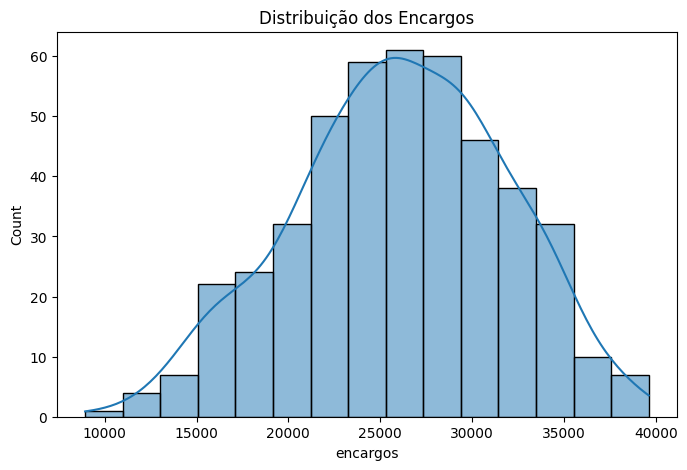

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df["encargos"], kde=True)
plt.title("Distribuição dos Encargos")
plt.show()

In [ ]:
df.columns = ['idade', 'genero', 'imc', 'filhos', 'fumante', 'regiao', 'encargos']

In [ ]:
df.isnull().sum()

,0
idade,41
genero,26
imc,32
filhos,31
fumante,43
regiao,42
encargos,47


In [8]:
df = df.replace({
    'genero': {'feminino': 'female', 'masculino': 'male'},
    'fumante': {'sim': 'yes', 'não': 'no'},
    'regiao': {'sudeste': 'southeast', 'sudoeste': 'southwest',
               'nordeste': 'northeast', 'noroeste': 'northwest'}
})

In [9]:
# Remove todas as linhas com qualquer NaN
df = df.dropna()

In [25]:
# Redefine X e y após remoção dos NaNs
X = df.drop("encargos", axis=1)
y = df["encargos"]

# Define os atributos numéricos e categóricos
num_atributos = ["idade", "imc", "filhos"]
cat_atributos = ["genero", "fumante", "regiao"]

In [26]:
# Define os atributos numéricos e categóricos com nomes em inglês
num_atributos = ["age", "imc", "children"]
cat_atributos = ["gender", "smoker", "region"]

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessador = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_atributos),
    ("cat", cat_pipeline, cat_atributos)
])

modelo = Pipeline(steps=[
    ("preprocessador", preprocessador),
    ("regressor", LinearRegression())
])

# Rename columns in X to match the English names
X.columns = ['age', 'gender', 'imc', 'children', 'smoker', 'region']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)

In [30]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 1249.2592359006246
RMSE: 2512376.9128332133
R²: 0.9263015745643925


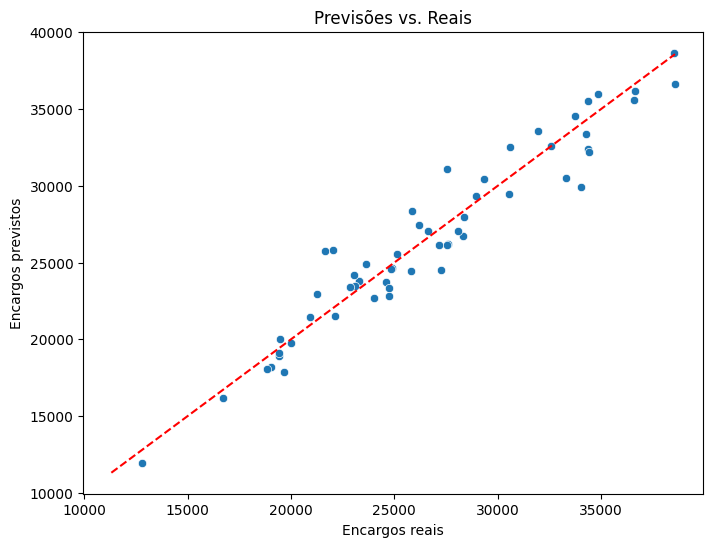

In [32]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Encargos reais")
plt.ylabel("Encargos previstos")
plt.title("Previsões vs. Reais")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()

In [33]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X_ = pd.get_dummies(X, drop_first=True)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y, test_size=0.2, random_state=42)
X_train_sm = sm.add_constant(X_train_)

ols_model = sm.OLS(y_train_, X_train_sm.values.astype(float)).fit()

print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               encargos   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     399.3
Date:                Tue, 03 Jun 2025   Prob (F-statistic):          4.65e-126
Time:                        22:08:26   Log-Likelihood:                -1989.9
No. Observations:                 228   AIC:                             3998.
Df Residuals:                     219   BIC:                             4029.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1293.7182    680.810      1.900      0.0

## Conclusão

Com base nos resultados:
- O modelo apresentou uma boa capacidade preditiva com base no R².
- As variáveis mais influentes nos custos são o hábito de fumar e o IMC.
- O modelo pode ser utilizado como base para estimativas de seguros médicos individuais.

É possível aprimorar o modelo com mais dados e com modelos mais robustos como Árvores de Regressão, Random Forest ou XGBoost.